In [89]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, Table

In [73]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [74]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [75]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#month_of_june = dt.date(2017, 6, 30) - dt.timedelta(days=30)
#start_date = dt.datetime(2017,5,31)
#end_date = dt.datetime(2017,6,30)
results = session.query(Measurement.date,Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date) == "06").all()

len(results)

1700

In [76]:
#  3. Convert the June temperatures to a list.

june_temps = results
june_temps

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [77]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns = ['date','temperature'])
june_temps_df


,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [78]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [79]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date,Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date) == "12").all()

len(results)

1517

In [80]:
# 7. Convert the December temperatures to a list.
decem_temps = results
decem_temps

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [81]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
decem_temps_df = pd.DataFrame(decem_temps, columns = ['date','temperature'])
decem_temps_df


,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [82]:
decem_temps_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Calculate summary statistics for precipitation in June

In [97]:
metadata = MetaData()
table = Table('Measurement',metadata, autoload = True, autoload_with = engine)
table.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [98]:
results = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m",Measurement.date) == "06").all()

#len(results)

june_prcp = results
june_prcp

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [101]:
june_prcp_df = pd.DataFrame(june_prcp, columns = ['date','precipitation'])
june_prcp_df


,date,precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [102]:
june_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


# Calculate summary statistics for precipitation in December

In [105]:
results = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m",Measurement.date) == "12").all()

#len(results)

decem_prcp = results
decem_prcp

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [106]:
decem_prcp_df = pd.DataFrame(decem_prcp, columns = ['date','precipitation'])
decem_prcp_df


,date,precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [107]:
decem_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


# Make graphs of June and December temperature side by side

<BarContainer object of 2 artists>

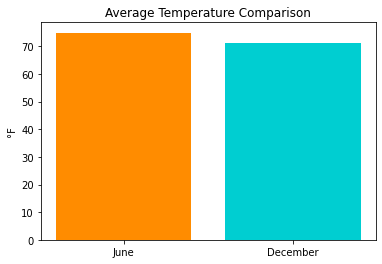

In [130]:
import matplotlib
import matplotlib.pyplot as plt

x_axis = ['June','December']
colors = ['darkorange','darkturquoise']
average_june_temp = june_temps_df['temperature'].mean()
average_decem_temp = decem_temps_df['temperature'].mean()


average_june_temp,average_decem_temp
plt.title("Average Temperature Comparison")
plt.ylabel("°F")
plt.bar(x_axis,[average_june_temp,average_decem_temp],color = colors)

<BarContainer object of 2 artists>

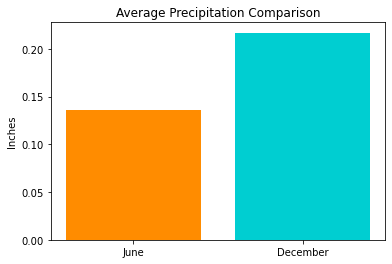

In [132]:
# Make graphs of June and December precipitation side by side

x_axis = ['June','December']
colors = ['darkorange','darkturquoise']
average_june_prcp = june_prcp_df['precipitation'].mean()
average_decem_prcp = decem_prcp_df['precipitation'].mean()


average_june_prcp,average_decem_prcp
plt.title("Average Precipitation Comparison")
plt.ylabel("Inches")
plt.bar(x_axis,[average_june_prcp,average_decem_prcp],color = colors)

In [146]:
#How many days in June and December had no rain?

june_no_rain = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m",Measurement.date) == "06").\
    filter(Measurement.prcp == 0).count()
june_almost_no_rain = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m",Measurement.date) == "06").\
    filter(Measurement.prcp <= 0.15).count()
june_all_days = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m",Measurement.date) == "06").count()

decem_no_rain = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m",Measurement.date) == "12").\
    filter(Measurement.prcp == 0).count()
decem_almost_no_rain = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m",Measurement.date) == "12").\
    filter(Measurement.prcp <= 0.15).count()
decem_all_days = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m",Measurement.date) == "12").count()

june_pct_sunny = june_no_rain/float(june_all_days)
decem_pct_sunny = decem_no_rain/float(decem_all_days)
june_pct_mostly_sunny = june_almost_no_rain/float(june_all_days)*100
decem_pct_mostly_sunny = decem_almost_no_rain/float(june_all_days)*100
#june_no_rain,decem_no_rain,june_all_days,decem_all_days,june_pct_sunny,decem_pct_sunny
june_pct_mostly_sunny,decem_pct_mostly_sunny



(73.0, 62.588235294117645)

<BarContainer object of 2 artists>

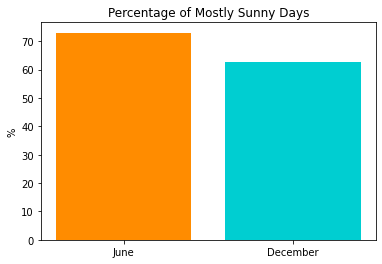

In [148]:
# Make graphs of June and December average percentage of mostly sunny days side by side

x_axis = ['June','December']
colors = ['darkorange','darkturquoise']



plt.title("Percentage of Mostly Sunny Days")
plt.ylabel("%")
plt.bar(x_axis,[june_pct_mostly_sunny,decem_pct_mostly_sunny],color = colors)